The goal here is to plot out `rotSkyPos` and `rotTelPos` distributions before and after rotational dithers. The data is already saved by running `save_rot_data.py`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [2]:
fontsize = 18
#pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

**Set up**

In [3]:
data_path = '/global/homes/a/awan/desc/wp_descDithers_csvs/compare_rot_dith/'
outdir = data_path

**Get the data**

In [4]:
%%time
# get all the files
data_files = [f for f in os.listdir(data_path) if f.endswith('csv')]

# now read in the data
simdatas = {}
for i, file in enumerate(data_files): # loop over all the db files
    print(file)
    db = file.split('_data.csv')[0]
    simdatas[db] = pd.read_csv('%s/%s'%(data_path, file))
print('\n## Read in data for %s dbs'%(i))

kraken_2044_data.csv
baseline2018a_data.csv
alt_sched_rolling_data.csv
alt_sched_data.csv
colossus_2665_data.csv
mothra_2049_data.csv
kraken_2035_data.csv
colossus_2664_data.csv
mothra_2045_data.csv
pontus_2489_data.csv
kraken_2042_data.csv
kraken_2026_data.csv
nexus_2097_data.csv
kraken_2036_data.csv
pontus_2502_data.csv
pontus_2002_data.csv
colossus_2667_data.csv

## Read in data for 16 dbs
CPU times: user 26.6 s, sys: 2.21 s, total: 28.8 s
Wall time: 28.8 s


**Set up to plot things**

In [5]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', \
       'colossus_2665', 'colossus_2664', 'colossus_2667', 'pontus_2002', \
       'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097', \
       'alt_sched', 'alt_sched_rolling']

In [6]:
ndbs = len(dbs)

from matplotlib import cm
colors = [cm.viridis(i) for i in np.arange(0, 255, int(255/ndbs))]

if len(colors)<ndbs: raise ValueError('Not enough colors.')

**Figure out the min, maxs on the arrays**

In [7]:
mins = {'tel': 100, 'dithtel': 100, 'sky': 100, 'dithsky': 10}
maxs = {'tel': -100, 'dithtel': -100, 'sky': -100, 'dithsky': -100}
for db in dbs:
    # add dithered rotSkyPos to the dictionary
    simdatas[db]['randomDitherPerFilterChangeRotSkyPos'] = simdatas[db]['randomDitherPerFilterChangeRotTelPos']-simdatas[db]['PA']
    # look at the min, max
    mins['tel'] = min(mins['tel'], min(simdatas[db]['rotTelPos']))
    mins['dithtel'] = min(mins['dithtel'], min(simdatas[db]['randomDitherPerFilterChangeRotTelPos']))
    mins['sky'] = min(mins['sky'], min(simdatas[db]['rotSkyPos']))
    mins['dithsky'] = min(mins['dithsky'], min(simdatas[db]['randomDitherPerFilterChangeRotSkyPos']))
    
    maxs['tel'] = max(maxs['tel'], max(simdatas[db]['rotTelPos']))
    maxs['dithtel'] = max(maxs['dithtel'], max(simdatas[db]['randomDitherPerFilterChangeRotTelPos']))
    maxs['sky'] = max(maxs['sky'], max(simdatas[db]['rotSkyPos']))
    maxs['dithsky'] = max(maxs['dithsky'], max(simdatas[db]['randomDitherPerFilterChangeRotSkyPos']))
    
print('mins: %s\nmaxs: %s'%(mins, maxs))

mins: {'tel': -90.0, 'dithtel': -90.0, 'sky': 0.0, 'dithsky': -269.99996090244122}
maxs: {'tel': 90.0, 'dithtel': 90.0, 'sky': 360.0, 'dithsky': 269.99974719829328}


Okay dithered rotSkyPos range is not the same as undithered one. Wrap the dithered values.

In [8]:
mins = {'tel': 100, 'dithtel': 100, 'sky': 100, 'dithsky': 10}
maxs = {'tel': -100, 'dithtel': -100, 'sky': -100, 'dithsky': -100}
for db in dbs:
    # wrap the dithered rotSkyPos
    ind = simdatas[db]['randomDitherPerFilterChangeRotSkyPos'] < 0
    simdatas[db]['randomDitherPerFilterChangeRotSkyPos'][ind] += 360
    
    # look at the min, max
    mins['tel'] = min(mins['tel'], min(simdatas[db]['rotTelPos']))
    mins['dithtel'] = min(mins['dithtel'], min(simdatas[db]['randomDitherPerFilterChangeRotTelPos']))
    mins['sky'] = min(mins['sky'], min(simdatas[db]['rotSkyPos']))
    mins['dithsky'] = min(mins['dithsky'], min(simdatas[db]['randomDitherPerFilterChangeRotSkyPos']))
    
    maxs['tel'] = max(maxs['tel'], max(simdatas[db]['rotTelPos']))
    maxs['dithtel'] = max(maxs['dithtel'], max(simdatas[db]['randomDitherPerFilterChangeRotTelPos']))
    maxs['sky'] = max(maxs['sky'], max(simdatas[db]['rotSkyPos']))
    maxs['dithsky'] = max(maxs['dithsky'], max(simdatas[db]['randomDitherPerFilterChangeRotSkyPos']))

print('mins: %s\nmaxs: %s'%(mins, maxs))

mins: {'tel': -90.0, 'dithtel': -90.0, 'sky': 0.0, 'dithsky': 1.6519418997162916e-05}
maxs: {'tel': 90.0, 'dithtel': 90.0, 'sky': 360.0, 'dithsky': 359.99997761812386}


The ranges are now similar for dithered and undithered cases.

**Plot distrobutions**

In [9]:
bins_telpos = np.arange(-90, 90, 0.5)
bins_skypos = np.arange(0, 360, 0.5)

Saved compare_rot_angles_nodith_wdith_17dbs_unrestricted.png


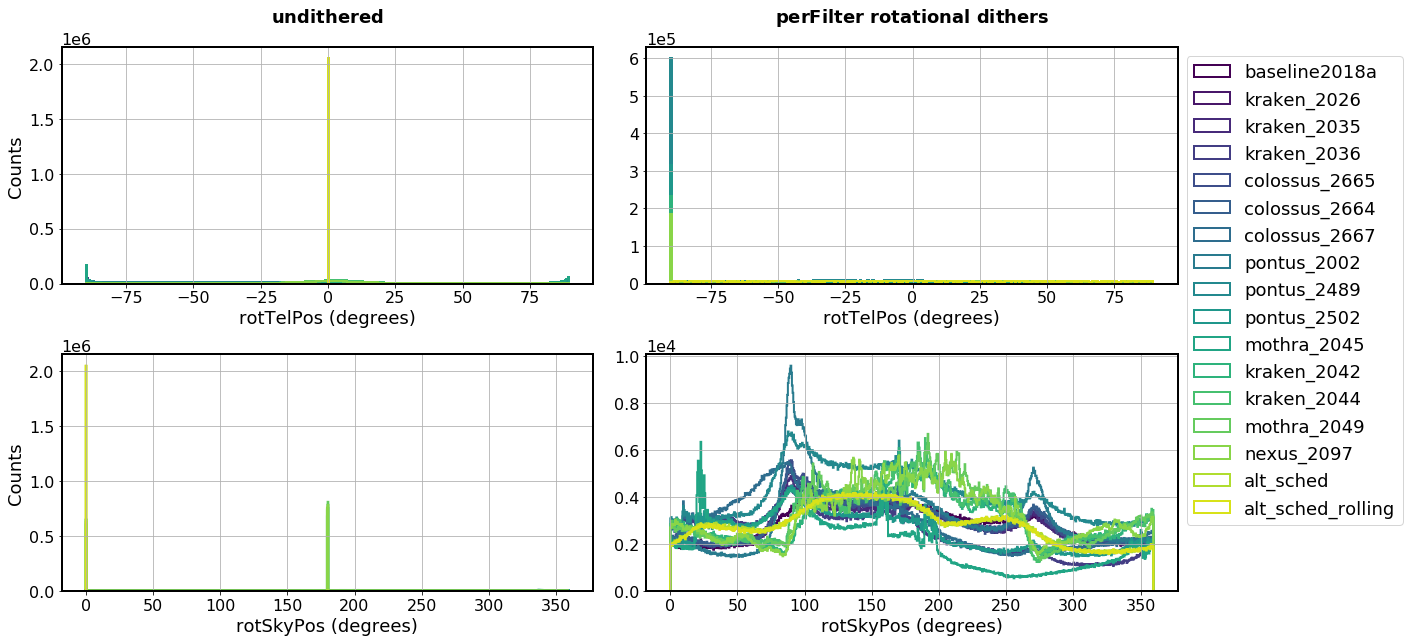

In [10]:
# histograms of dithers
nrows, ncols = 2,2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
plt.subplots_adjust(hspace=0.3, wspace=0.1)

for i, db in enumerate(dbs):
    if db in simdatas:
        # undithered rotTelPos
        axes[0, 0].hist(simdatas[db]['rotTelPos'], bins=bins_telpos,
                        color=colors[i], histtype='step', lw=2)
        # dithered rotTelPos
        axes[0, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotTelPos'],
                        label=db, bins=bins_telpos, color=colors[i], histtype='step', lw=2)
        # undithered rotSkyPos
        axes[1, 0].hist(simdatas[db]['rotSkyPos'],
                        bins=bins_skypos, color=colors[i], histtype='step', lw=2)
        # dithered rotSkyPos
        axes[1, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotSkyPos'],
                        bins=bins_skypos, color=colors[i], histtype='step', lw=2)

#ymax_tel, ymax_sky = 0, 0
#for col in range(ncols):
#    ymax_tel = max([ymax_tel, axes[0, col].get_ylim()[-1]])
#    ymax_sky = max([ymax_sky, axes[1, col].get_ylim()[-1]])
        
ymax_tel, ymax_sky = 10**5, 10**5
for row in range(nrows):
    for col in range(ncols):
        #axes[0, col].set_ylim(0, ymax_tel)
        #axes[1, col].set_ylim(0, ymax_sky)
        axes[row, col].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        axes[row, 0].set_ylabel('Counts')
        axes[0, col].set_xlabel('rotTelPos (degrees)')
        axes[1, col].set_xlabel('rotSkyPos (degrees)')
        axes[row, col].grid()

axes[0, 1].legend(bbox_to_anchor=(1.,1))
axes[0, 0].set_title(r'$\bf{undithered}$', fontsize=fontsize, y=1.08)
axes[0, 1].set_title(r'$\bf{perFilter \ rotational \ dithers}$', fontsize=fontsize, y=1.08)
fig.set_size_inches(20,10)
filename = 'compare_rot_angles_nodith_wdith_%sdbs_unrestricted.png'%(i+1)
plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)

plt.show()

Okay the dithers are helping the pileups at -90, 0 deg for rotTelPos and 0, 180 for rotSkyPos. Lets zoom in to see some of the distributions more clearly.

Saved compare_rot_angles_nodith_wdith_17dbs_restrictedylims.png


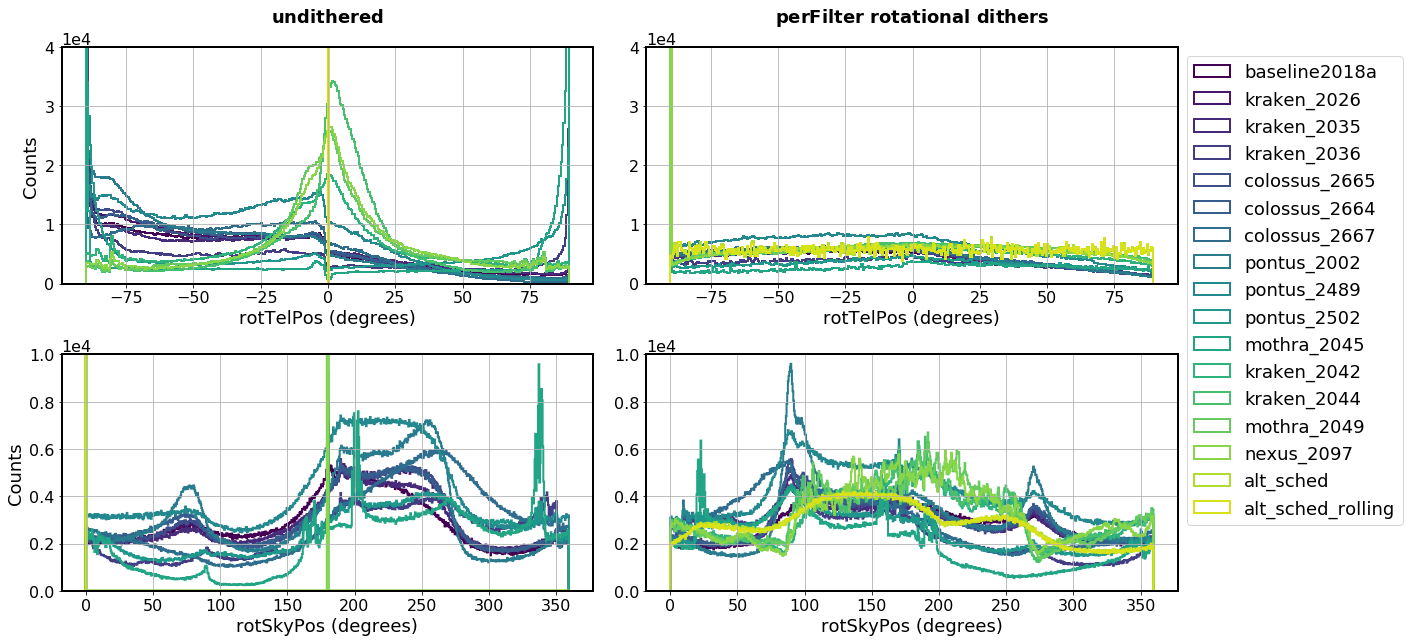

In [11]:
# histograms of dithers
nrows, ncols = 2,2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
plt.subplots_adjust(hspace=0.3, wspace=0.1)

for i, db in enumerate(dbs):
    if db in simdatas:
        # undithered rotTelPos
        axes[0, 0].hist(simdatas[db]['rotTelPos'], bins=bins_telpos,
                        color=colors[i], histtype='step', lw=2)
        # dithered rotTelPos
        axes[0, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotTelPos'],
                        label=db, bins=bins_telpos, color=colors[i], histtype='step', lw=2)
        # undithered rotSkyPos
        axes[1, 0].hist(simdatas[db]['rotSkyPos'],
                        bins=bins_skypos, color=colors[i], histtype='step', lw=2)
        # dithered rotSkyPos
        axes[1, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotSkyPos'],
                        bins=bins_skypos, color=colors[i], histtype='step', lw=2)

#ymax_tel, ymax_sky = 0, 0
#for col in range(ncols):
#    ymax_tel = max([ymax_tel, axes[0, col].get_ylim()[-1]])
#    ymax_sky = max([ymax_sky, axes[1, col].get_ylim()[-1]])
        
ymax_tel, ymax_sky = 0.4*10**5, 10**4
for row in range(nrows):
    for col in range(ncols):
        axes[0, col].set_ylim(0, ymax_tel)
        axes[1, col].set_ylim(0, ymax_sky)
        axes[row, col].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        axes[row, 0].set_ylabel('Counts')
        axes[0, col].set_xlabel('rotTelPos (degrees)')
        axes[1, col].set_xlabel('rotSkyPos (degrees)')
        axes[row, col].grid()

axes[0, 1].legend(bbox_to_anchor=(1.,1))
axes[0, 0].set_title(r'$\bf{undithered}$', fontsize=fontsize, y=1.08)
axes[0, 1].set_title(r'$\bf{perFilter \ rotational \ dithers}$', fontsize=fontsize, y=1.08)
fig.set_size_inches(20,10)
filename = 'compare_rot_angles_nodith_wdith_%sdbs_restrictedylims.png'%(i+1)
plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)

plt.show()

Interesting: some cadences lead to a large pileup at 0 for rotTelPos even after dithers. Need to look into that but the guess is that these cadences are seeing more visits that do not get dithered (since no offset is found that wouldn't push the visits past the rotTelPos limits).

roySkypos is pretty non-uniform even after dithers, although the dithers get rid of the pileups at 0, 180 degrees.

**A Check**

Since $rotSkyPos = rotTelPos - ParallacticAngle$, lets see what happens if we dont use the ParallacticAngleStacker to go from dithered rotTelPos to dithered rotSkyPos but use the parallactic angle from undithered rotTelPos and rotSkyPos numbers.

Considering baseline2018a


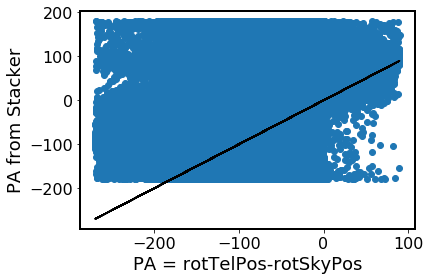

In [12]:
db = 'baseline2018a'
print('Considering %s'%db)
PA = simdatas[db]['rotTelPos']-simdatas[db]['rotSkyPos']
PA[PA<-180] += 180
plt.scatter(PA, simdatas[db]['PA'])
plt.plot(PA, PA, 'k')
plt.xlabel('PA = rotTelPos-rotSkyPos')
plt.ylabel('PA from Stacker')
plt.show()

Okay this is strange. Not sure why is there comparison is so off. Lets just compare the distributions for rotSkyPos and rotTelPos:

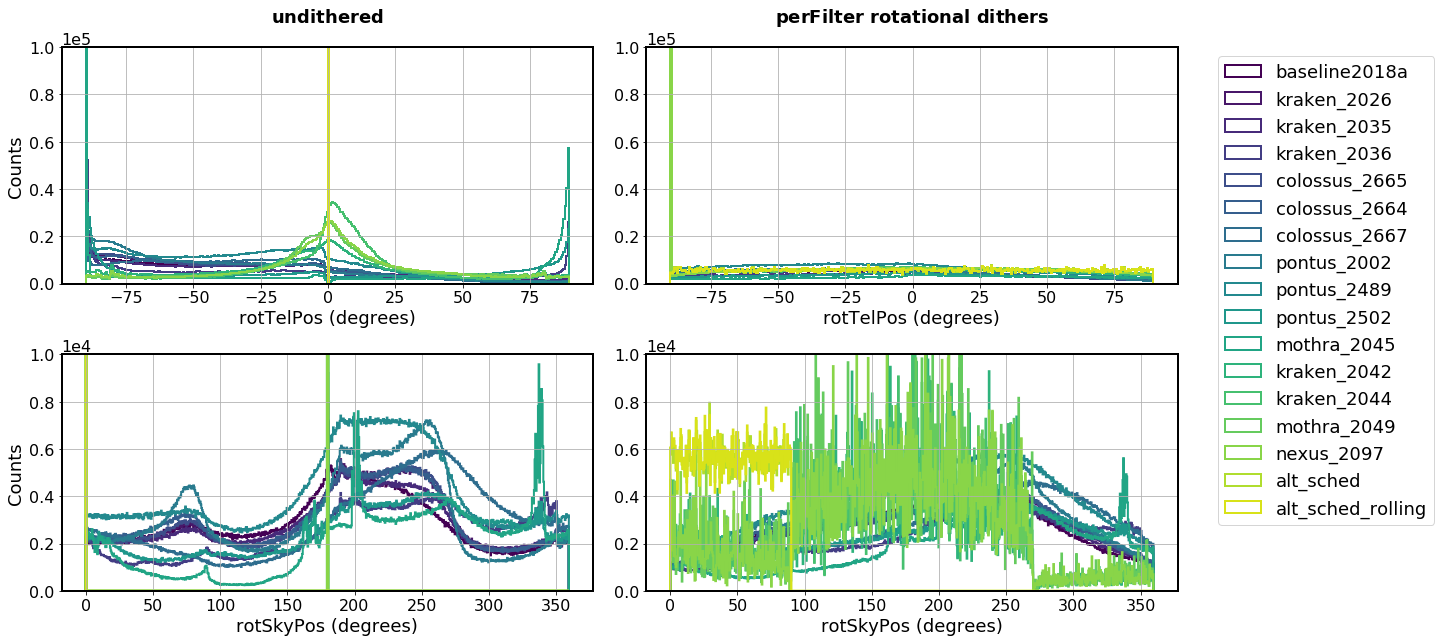

In [13]:
# histograms of dithers
nrows, ncols = 2,2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
plt.subplots_adjust(hspace=0.3, wspace=0.1)

for i, db in enumerate(dbs):
    if db in simdatas:
        # undithered rotTelPos
        axes[0, 0].hist(simdatas[db]['rotTelPos'], bins=bins_telpos,
                        color=colors[i], histtype='step', lw=2)
        # dithered rotTelPos
        axes[0, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotTelPos'],
                         label=db,
                        bins=bins_telpos, color=colors[i], histtype='step', lw=2)
        # undithered rotSkyPos
        axes[1, 0].hist(simdatas[db]['rotSkyPos'],
                        bins=bins_skypos, color=colors[i], histtype='step', lw=2)
        # dithered rotSkyPos
        PA = simdatas[db]['rotTelPos'] - simdatas[db]['rotSkyPos']
        axes[1, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotTelPos']-PA,
                        bins=bins_skypos, color=colors[i], histtype='step', lw=2)

#ymax_tel, ymax_sky = 0, 0
#for col in range(ncols):
#    ymax_tel = max([ymax_tel, axes[0, col].get_ylim()[-1]])
#    ymax_sky = max([ymax_sky, axes[1, col].get_ylim()[-1]])
ymax_tel, ymax_sky = 10**5, 10**4
        
for row in range(nrows):
    for col in range(ncols):
        axes[0, col].set_ylim(0, ymax_tel)
        axes[1, col].set_ylim(0, ymax_sky)
        axes[row, col].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        axes[row, 0].set_ylabel('Counts')
        axes[0, col].set_xlabel('rotTelPos (degrees)')
        axes[1, col].set_xlabel('rotSkyPos (degrees)')
        axes[row, col].grid()

axes[0, 1].legend(bbox_to_anchor=(1.5,1))
axes[0, 0].set_title(r'$\bf{undithered}$', fontsize=fontsize, y=1.08)
axes[0, 1].set_title(r'$\bf{perFilter \ rotational \ dithers}$', fontsize=fontsize, y=1.08)
plt.gcf().set_size_inches(20,10)
plt.show()

Okay, dithered rotSkyPos doesn't look right so ParallacticAngleStacker appears to be the way to go.